In [37]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from scipy.stats import norm
from operator import itemgetter
from sklearn.model_selection import cross_val_score

In [38]:
df = pd.read_csv(r"dataset\ipl_player_data_2021.csv",encoding="latin1")
df.head()


,Name,Team,Batting_Hand,Bowling_Type,Role,Matches,Innings,Not Outs,Runs,Highest,...,Innings_Bowl,Balls,Runs_Given,Wickets,BBI,Economy,B_Average,BSR,5W,10W
0,Ruturaj Gaikwad,Chennai Super Kings,Right,Right-arm offbreak,BATSMAN,6,6,2,204,72,...,0,0,0,0,0,0.0,0.0,0.00,0,0
1,KL Rahul,Punjab Kings,Right,NaN,WICKET KEEPER,81,72,13,2647,132,...,0,0,0,0,0,0.0,0.0,0.00,0,0
2,David Warner,Sunrisers Hyderabad,Left,Right-arm legbreak,BATSMAN,142,142,19,5254,126,...,1,1,2,0,0/2,0.0,0.0,0.00,0,0
3,Jonny Bairstow,Sunrisers Hyderabad,Right,Right-arm medium,WICKET KEEPER,21,21,2,790,114,...,0,0,0,0,0,0.0,0.0,0.00,0,0
4,Chris Gayle,Punjab Kings,Left,Right-arm offbreak,BATSMAN,132,131,15,4772,175,...,38,554,729,18,Mar-21,7.9,40.5,30.78,0,0


In [39]:
df.columns

Index(['Name', 'Team', 'Batting_Hand', 'Bowling_Type', 'Role', 'Matches',
       'Innings', 'Not Outs', 'Runs', 'Highest', 'Average', 'BF', 'SR', '100',
       '200', '50', '4', '6', 'Innings_Bowl', 'Balls', 'Runs_Given', 'Wickets',
       'BBI', 'Economy', 'B_Average', 'BSR', '5W', '10W'],
      dtype='object')

In [40]:
 df.drop([ 'BBI'],axis=1,inplace=True)


In [41]:
df

,Name,Team,Batting_Hand,Bowling_Type,Role,Matches,Innings,Not Outs,Runs,Highest,...,6,Innings_Bowl,Balls,Runs_Given,Wickets,Economy,B_Average,BSR,5W,10W
0,Ruturaj Gaikwad,Chennai Super Kings,Right,Right-arm offbreak,BATSMAN,6,6,2,204,72,...,6,0,0,0,0,0.00,0.00,0.00,0,0
1,KL Rahul,Punjab Kings,Right,NaN,WICKET KEEPER,81,72,13,2647,132,...,104,0,0,0,0,0.00,0.00,0.00,0,0
2,David Warner,Sunrisers Hyderabad,Left,Right-arm legbreak,BATSMAN,142,142,19,5254,126,...,194,1,1,2,0,0.00,0.00,0.00,0,0
3,Jonny Bairstow,Sunrisers Hyderabad,Right,Right-arm medium,WICKET KEEPER,21,21,2,790,114,...,31,0,0,0,0,0.00,0.00,0.00,0,0
4,Chris Gayle,Punjab Kings,Left,Right-arm offbreak,BATSMAN,132,131,15,4772,175,...,349,38,554,729,18,7.90,40.50,30.78,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Shahrukh Khan,Punjab Kings,Right,Right-arm offbreak,ALL ROUNDER,0,0,0,0,0,...,0,0,0,0,0,0.00,0.00,0.00,0,0
192,Saurabh Kumar,Punjab Kings,Left,Left-arm orthodox,ALL ROUNDER,0,0,0,0,0,...,0,0,0,0,0,0.00,0.00,0.00,0,0
193,Vaibhav Arora,Kolkata Knight Riders,Right,Right-arm fast,BOWLER,0,0,0,0,0,...,0,0,0,0,0,0.00,0.00,0.00,0,0
194,Venkatesh Iyer,Kolkata Knight Riders,Left,Right-arm medium,ALL ROUNDER,0,0,0,0,0,...,0,0,0,0,0,0.00,0.00,0.00,0,0


In [42]:
le = preprocessing.LabelEncoder()
df['Team']= le.fit_transform(df['Team'])
df['Batting_Hand']= le.fit_transform(df['Batting_Hand'])
df['Bowling_Type']= le.fit_transform(df['Bowling_Type'])
df['Role'] = le.fit_transform(df['Role'])


In [43]:
df

,Name,Team,Batting_Hand,Bowling_Type,Role,Matches,Innings,Not Outs,Runs,Highest,...,6,Innings_Bowl,Balls,Runs_Given,Wickets,Economy,B_Average,BSR,5W,10W
0,Ruturaj Gaikwad,0,1,6,1,6,6,2,204,72,...,6,0,0,0,0,0.00,0.00,0.00,0,0
1,KL Rahul,4,1,7,3,81,72,13,2647,132,...,104,0,0,0,0,0.00,0.00,0.00,0,0
2,David Warner,7,0,4,1,142,142,19,5254,126,...,194,1,1,2,0,0.00,0.00,0.00,0,0
3,Jonny Bairstow,7,1,5,3,21,21,2,790,114,...,31,0,0,0,0,0.00,0.00,0.00,0,0
4,Chris Gayle,4,0,6,1,132,131,15,4772,175,...,349,38,554,729,18,7.90,40.50,30.78,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Shahrukh Khan,4,1,6,0,0,0,0,0,0,...,0,0,0,0,0,0.00,0.00,0.00,0,0
192,Saurabh Kumar,4,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0.00,0.00,0.00,0,0
193,Vaibhav Arora,2,1,3,2,0,0,0,0,0,...,0,0,0,0,0,0.00,0.00,0.00,0,0
194,Venkatesh Iyer,2,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0.00,0.00,0.00,0,0


In [44]:
df = df.fillna(0)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          196 non-null    object 
 1   Team          196 non-null    int32  
 2   Batting_Hand  196 non-null    int32  
 3   Bowling_Type  196 non-null    int32  
 4   Role          196 non-null    int32  
 5   Matches       196 non-null    int64  
 6   Innings       196 non-null    int64  
 7   Not Outs      196 non-null    int64  
 8   Runs          196 non-null    int64  
 9   Highest       196 non-null    int64  
 10  Average       196 non-null    float64
 11  BF            196 non-null    int64  
 12  SR            196 non-null    float64
 13  100           196 non-null    int64  
 14  200           196 non-null    int64  
 15  50            196 non-null    int64  
 16  4             196 non-null    int64  
 17  6             196 non-null    int64  
 18  Innings_Bowl  196 non-null    

In [47]:
df.columns

Index(['Name', 'Team', 'Batting_Hand', 'Bowling_Type', 'Role', 'Matches',
       'Innings', 'Not Outs', 'Runs', 'Highest', 'Average', 'BF', 'SR', '100',
       '200', '50', '4', '6', 'Innings_Bowl', 'Balls', 'Runs_Given', 'Wickets',
       'Economy', 'B_Average', 'BSR', '5W', '10W'],
      dtype='object')

In [50]:
df_bats = pd.DataFrame(columns = ['Name', 'Team', 'Batting_Hand', 'Bowling_Type', 'Role', 'Matches',
       'Innings', 'Not Outs', 'Runs', 'Highest', 'Average', 'BF', 'SR', '100',
       '200', '50', '4', '6'])
j=0
for i in range(len(df['Role'])):
    if df['Role'][i] == 1:
        df_bats.loc[j]= df.iloc[i]
        j+=1

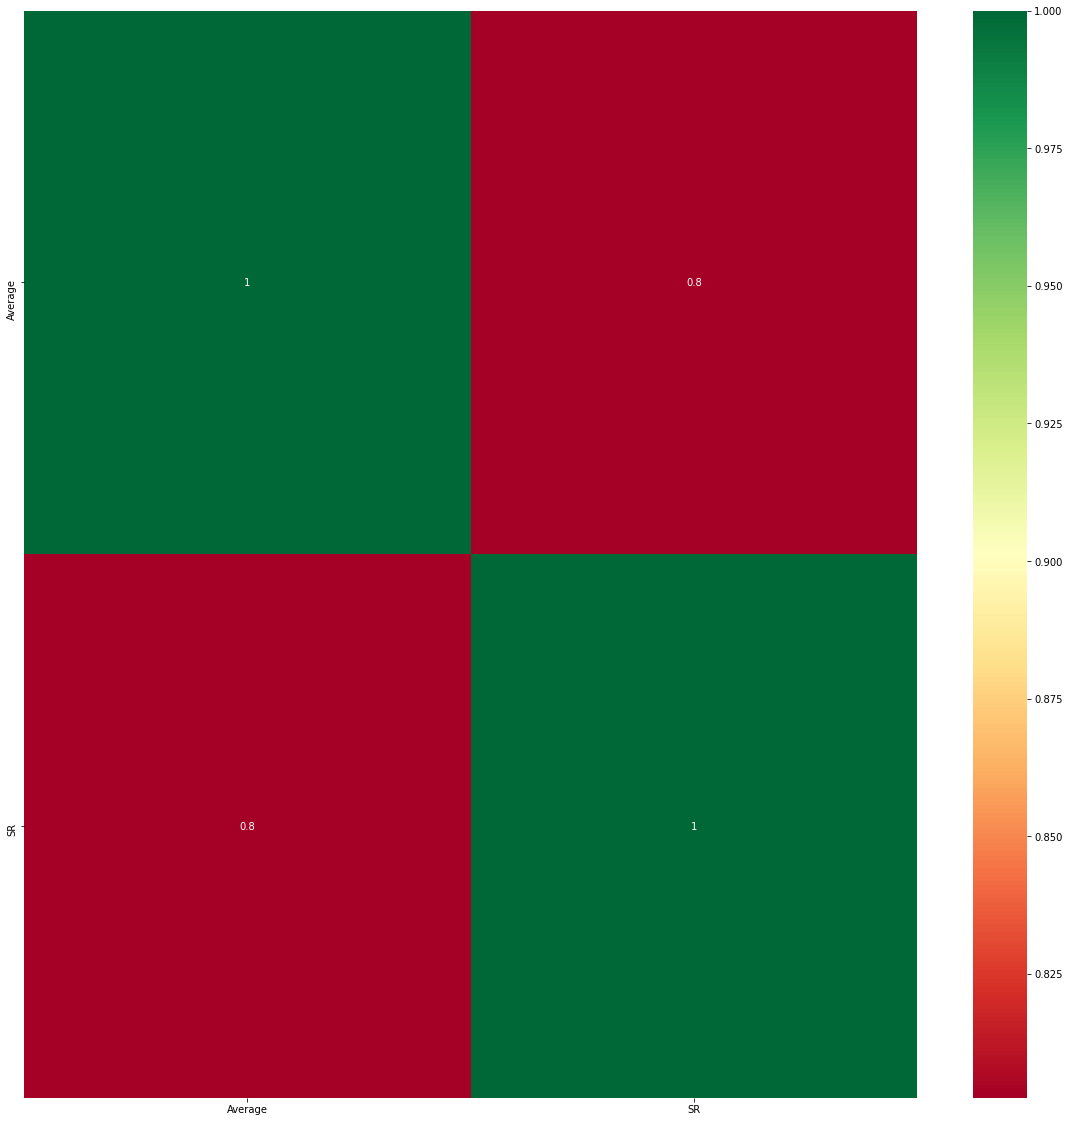

In [52]:
Historical = df_bats[['Name', 'Team', 'Batting_Hand', 'Bowling_Type', 'Role', 'Matches',
       'Innings', 'Not Outs', 'Runs', 'Highest', 'Average', 'BF', 'SR', '100',
       '200', '50', '4', '6']]

fig = plt.figure(figsize=(20, 20))

fig.set_facecolor('white')

sns.heatmap(Historical.corr(), annot=True, cmap="RdYlGn")

plt.savefig("corr_matrix.png")

In [53]:
df_bats['Bat_Score'] = 0.5*df_bats['Runs']+0.5*df_bats['100']+0.5*df_bats['200']+0.5*df_bats['50']+0.5*df_bats['4']+0.5*df_bats['6']

In [54]:
df_bats.head()

,Name,Team,Batting_Hand,Bowling_Type,Role,Matches,Innings,Not Outs,Runs,Highest,Average,BF,SR,100,200,50,4,6,Bat_Score
0,Ruturaj Gaikwad,0,1,6,1,6,6,2,204,72,51.00,169,120.71,0,0,3,16,6,114.5
1,David Warner,7,0,4,1,142,142,19,5254,126,42.72,3712,141.54,4,0,48,511,194,3005.5
2,Chris Gayle,4,0,6,1,132,131,15,4772,175,41.14,3179,150.11,6,0,31,384,349,2771.0
3,Kane Williamson,7,1,6,1,53,52,11,1619,89,39.49,1201,134.80,0,0,15,136,54,912.0
4,Virat Kohli,6,1,5,1,192,184,30,5878,113,38.17,4496,130.74,5,0,39,503,201,3313.0


In [55]:
# Sort according to Bat_Score
df_bats = df_bats.sort_values(by=['Bat_Score'], ascending=False)
df_bats.head(10)

,Name,Team,Batting_Hand,Bowling_Type,Role,Matches,Innings,Not Outs,Runs,Highest,Average,BF,SR,100,200,50,4,6,Bat_Score
4,Virat Kohli,6,1,5,1,192,184,30,5878,113,38.17,4496,130.74,5,0,39,503,201,3313.0
10,Suresh Raina,0,0,6,1,193,189,28,5368,100,33.34,3915,137.11,1,0,38,493,194,3047.0
1,David Warner,7,0,4,1,142,142,19,5254,126,42.72,3712,141.54,4,0,48,511,194,3005.5
15,Rohit Sharma,3,1,6,1,200,195,28,5230,109,31.32,4004,130.62,1,0,39,458,213,2970.5
6,Shikhar Dhawan,1,0,6,1,176,175,23,5196,106,34.18,4096,126.86,2,0,41,591,108,2969.0
2,Chris Gayle,4,0,6,1,132,131,15,4772,175,41.14,3179,150.11,6,0,31,384,349,2771.0
12,Ajinkya Rahane,1,1,5,1,149,140,16,3933,105,31.72,3240,121.39,2,0,28,416,76,2227.5
18,Ambati Rayudu,0,1,6,1,159,151,27,3659,100,29.51,2902,126.09,1,0,19,308,132,2059.5
17,Manish Pandey,7,1,5,1,146,135,25,3268,114,29.71,2686,121.67,1,0,18,287,93,1833.5
5,Steven Smith,1,1,4,1,95,86,20,2333,101,35.35,1805,129.25,1,0,11,212,58,1307.5
